# Intro to Machine Learning Homework 4 SVR

### Bryce Readyhough 
### ID-801005029

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

Loading in housing data from the provided CSV file

In [29]:
housingData = pd.DataFrame(pd.read_csv('Housing.csv'))
numRows = len(housingData)
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


The data above contains several datapoints which are boolean yes or no. For a linear regression line these will need to be converted into numeric 1s or 0s. These can be mapped using an xmap. 

The dataset provided already has the data categorized so each variable does not need to be split.

In [30]:
mapVars = ['mainroad', 'guestroom', 'hotwaterheating', 'basement', 'airconditioning', 'prefarea']

def binaryMap(x):
    return x.map({"yes" : 1, "no" : 0})

housingData[mapVars] = housingData[mapVars].apply(binaryMap)

housingData.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


The following datapoints will be used for the model:
- Area
- Bedrooms
- Bathrooms
- Stories
- Mainroad 
- Guestroom
- Basement
- Hotwaterheating
- Airconditioning
- Parking
- Prefarea

In [31]:
model_vars = ['price','area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

data = housingData[model_vars]
data.tail()

X = data.iloc[:,1:13].values
print(X[:10])

Y = data.iloc[:,0].values
print(Y[:10])

[[ 7420     4     2     3     1     0     0     0     1     2     1]
 [ 8960     4     4     4     1     0     0     0     1     3     0]
 [ 9960     3     2     2     1     0     1     0     0     2     1]
 [ 7500     4     2     2     1     0     1     0     1     3     1]
 [ 7420     4     1     2     1     1     1     0     1     2     0]
 [ 7500     3     3     1     1     0     1     0     1     2     1]
 [ 8580     4     3     4     1     0     0     0     1     2     1]
 [16200     5     3     2     1     0     0     0     0     0     0]
 [ 8100     4     1     2     1     1     1     0     1     2     1]
 [ 5750     3     2     4     1     1     0     0     1     1     1]]
[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000]


## Using an RBF Kernel

1


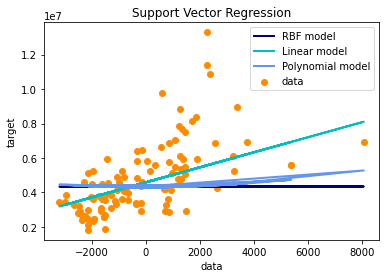

In [48]:
classifierRBF = SVR(kernel='rbf', C=1E3, gamma=0.1)
classifierLin = SVR(kernel='linear', C=1e3)
classifierPoly = SVR(kernel='poly', C=1e3, degree=2)


N = 1
#prob2Accuracy.append([N,1])
pca = PCA(N)
XPCA = pca.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(XPCA, Y, test_size = 0.2, random_state = 1, shuffle = True)
print(N)
Y_pred_RBF = classifierRBF.fit(X_train, np.ravel(Y_train)).predict(X_test)
Y_pred_Lin = classifierLin.fit(X_train, np.ravel(Y_train)).predict(X_test)
Y_pred_Poly = classifierPoly.fit(X_train, np.ravel(Y_train)).predict(X_test)
accuracy = 1

lw = 2 
plt.scatter(X_test, Y_test, color='darkorange', label='data') 
plt.plot(X_test, Y_pred_RBF, color='navy', lw=lw, label='RBF model') 
plt.plot(X_test, Y_pred_Lin, color='c', lw=lw, label='Linear model') 
plt.plot(X_test, Y_pred_Poly, color='cornflowerblue', lw=lw, label='Polynomial model') 
plt.xlabel('data') 
plt.ylabel('target') 
plt.title('Support Vector Regression') 
plt.legend() 
plt.show()

prob2Data.append([N,accuracy])    

In [52]:
ErrorData = []
for i in range(11,0,-1):
    N = i
    #prob2Accuracy.append([N,1])
    pca = PCA(N)
    XPCA = pca.fit_transform(X)

    X_train, X_test, Y_train, Y_test = train_test_split(XPCA, Y, test_size = 0.2, random_state = 1, shuffle = True)
    print(N)
    Y_pred_RBF = classifierRBF.fit(X_train, np.ravel(Y_train)).predict(X_test)
    Y_pred_Lin = classifierLin.fit(X_train, np.ravel(Y_train)).predict(X_test)
    Y_pred_Poly = classifierPoly.fit(X_train, np.ravel(Y_train)).predict(X_test)
    
    errorRBF = mean_squared_error(Y_test, Y_pred_RBF)
    errorLin = mean_squared_error(Y_test, Y_pred_Lin)
    errorPoly = mean_squared_error(Y_test, Y_pred_Poly)

    ErrorData.append([N,errorRBF, errorLin, errorPoly])    

11
10
9
8
7
6
5
4
3
2
1


In [54]:
#function to get specific items from lists
def Extract(lst, i):
    return [item[i] for item in lst]

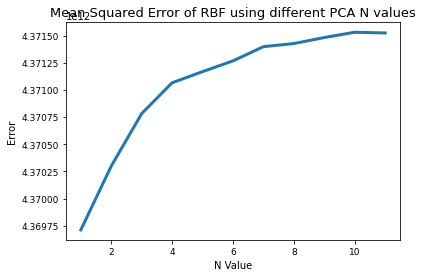

In [56]:
N_Values = Extract(ErrorData,0)
RBF_Values = Extract(ErrorData,1)

plt.plot(N_Values, RBF_Values, linewidth=3)
plt.title("Mean Squared Error of RBF using different PCA N values", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Error", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

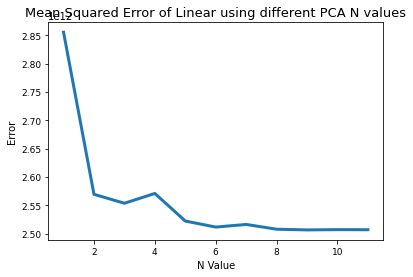

In [57]:
N_Values = Extract(ErrorData,0)
Lin_Values = Extract(ErrorData,2)

plt.plot(N_Values, Lin_Values, linewidth=3)
plt.title("Mean Squared Error of Linear using different PCA N values", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Error", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()

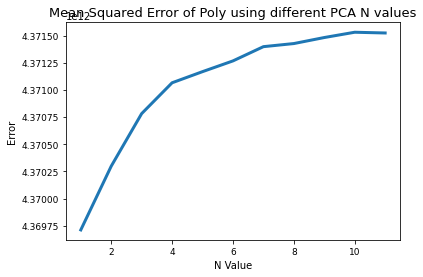

In [58]:
N_Values = Extract(ErrorData,0)
Poly_Values = Extract(ErrorData,1)

plt.plot(N_Values, Poly_Values, linewidth=3)
plt.title("Mean Squared Error of Poly using different PCA N values", fontsize=13)
plt.xlabel("N Value", fontsize=10)
plt.ylabel("Error", fontsize=10)
plt.tick_params(axis='both', labelsize=9)

plt.show()